#Connect and import packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ydata-profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from ydata_profiling import ProfileReport
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Data mining/Bai_bao_cao_mon_hoc/global air pollution dataset.csv')

#Overview data

In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
profile = ProfileReport(df)

In [ ]:
profile

In [ ]:
profile.to_file("""/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Data mining/Bai_bao_cao_mon_hoc/profileData.html""")

In [ ]:
fig = plt.figure(figsize = (8,8))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
df.info()

In [ ]:
print(df[df.isnull().any(axis = 1)])

In [ ]:
df[df["Country"].isnull()]

In [ ]:
df[df["City"].isnull()]

#Drop null values

In [ ]:
my_df = df.dropna()
my_df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [ ]:
my_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
my_df[my_df.isnull().any(axis=1)]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category


#Label encoding category data

In [ ]:
lb_values = {'Good': 0,
             'Moderate': 1,
             'Unhealthy for Sensitive Groups': 2,
             'Unhealthy': 3,
             'Very Unhealthy': 4,
             'Hazardous': 5}

In [ ]:
def MultiColumnEncoder(target, columns, data):
  output = data.copy(deep = True)
  for col in columns:
    output[col] = output[col].map(lb_values)
  return output

In [ ]:
my_df = MultiColumnEncoder('AQI Category',['AQI Category', 'NO2 AQI Category',\
                              'CO AQI Category', 'Ozone AQI Category', 'PM2.5 AQI Category'], my_df)
my_df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,1,1,0,36,0,0,0,51,1
1,Brazil,Presidente Dutra,41,0,1,0,5,0,1,0,41,0
2,Italy,Priolo Gargallo,66,1,1,0,39,0,2,0,66,1
3,Poland,Przasnysz,34,0,1,0,34,0,0,0,20,0
4,France,Punaauia,22,0,0,0,22,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,3,3,0,154,3,2,0,184,3
23459,France,Sceaux,50,0,1,0,20,0,5,0,50,0
23460,India,Mormugao,50,0,1,0,22,0,1,0,50,0
23461,United States of America,Westerville,71,1,1,0,44,0,2,0,71,1


#Label encoding 'Country'

In [ ]:
le = preprocessing.LabelEncoder()
map_Country = my_df[['Country']].copy(deep = True)
map_Country['Country_pre'] = le.fit_transform(map_Country['Country'])
print(map_Country.drop_duplicates())

                     Country  Country_pre
0         Russian Federation          130
1                     Brazil           22
2                      Italy           75
3                     Poland          123
4                     France           54
...                      ...          ...
15453                Bahrain           11
16001             Seychelles          137
17025     State of Palestine          148
22311  Saint Kitts and Nevis          132
22749                 Monaco          101

[175 rows x 2 columns]


In [ ]:
my_df['Country'] = map_Country['Country_pre']
my_df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,Praskoveya,51,1,1,0,36,0,0,0,51,1
1,22,Presidente Dutra,41,0,1,0,5,0,1,0,41,0
2,75,Priolo Gargallo,66,1,1,0,39,0,2,0,66,1
3,123,Przasnysz,34,0,1,0,34,0,0,0,20,0
4,54,Punaauia,22,0,0,0,22,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,Gursahaiganj,184,3,3,0,154,3,2,0,184,3
23459,54,Sceaux,50,0,1,0,20,0,5,0,50,0
23460,69,Mormugao,50,0,1,0,22,0,1,0,50,0
23461,166,Westerville,71,1,1,0,44,0,2,0,71,1


#Drop 'City'


In [ ]:
my_df = my_df.drop(columns = "City")

In [ ]:
my_df.columns

Index(['Country', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

#Split data to 3 peices

In [ ]:
df1_columns = ['Country', 'AQI Value', 'CO AQI Value', 'Ozone AQI Value',
               'NO2 AQI Value', 'PM2.5 AQI Value']
df1 = my_df.copy(deep = True)[df1_columns]
df1.head()

,Country,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,130,51,1,36,0,51
1,22,41,1,5,1,41
2,75,66,1,39,2,66
3,123,34,1,34,0,20
4,54,22,0,22,0,6


In [ ]:
df2_columns = ['Country', 'AQI Category', 'CO AQI Value', 'Ozone AQI Value',
               'NO2 AQI Value', 'PM2.5 AQI Value']
df2 = my_df.copy(deep = True)[df2_columns]
df2.head()

,Country,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,130,1,1,36,0,51
1,22,0,1,5,1,41
2,75,1,1,39,2,66
3,123,0,1,34,0,20
4,54,0,0,22,0,6


In [ ]:
df3_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category',\
               'NO2 AQI Category', 'PM2.5 AQI Category']
df3 = my_df.copy(deep = True)[df3_columns]
df3.head()

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,1,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0


#Data-mining df1:

###Import packages

In [ ]:
 !pip install lazypredict

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor

###Scale data

In [ ]:
mms = MinMaxScaler()
df1_scaled = mms.fit_transform(df1.to_numpy())
df1_scaled = pd.DataFrame(df1_scaled, columns = df1.columns)
df1_scaled

,Country,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,0.75,0.09,0.01,0.15,0.00,0.10
1,0.13,0.07,0.01,0.02,0.01,0.08
2,0.43,0.12,0.01,0.17,0.02,0.13
3,0.71,0.06,0.01,0.14,0.00,0.04
4,0.31,0.03,0.00,0.09,0.00,0.01
...,...,...,...,...,...,...
23030,0.40,0.36,0.02,0.66,0.02,0.37
23031,0.31,0.09,0.01,0.09,0.05,0.10
23032,0.40,0.09,0.01,0.09,0.01,0.10
23033,0.95,0.13,0.01,0.19,0.02,0.14


###Split train test


In [ ]:
df1_y = df1_scaled.pop('AQI Value')

In [ ]:
df1_y

0       0.09
1       0.07
2       0.12
3       0.06
4       0.03
        ... 
23030   0.36
23031   0.09
23032   0.09
23033   0.13
23034   0.13
Name: AQI Value, Length: 23035, dtype: float64

In [ ]:
df1_X = df1_scaled

In [ ]:
df1_X_train, df1_X_test, df1_y_train, df1_y_test = \
  train_test_split(df1_X,df1_y,
                   test_size = 0.2,
                   random_state = 42)

In [ ]:
print('df1_X_train: ', df1_X_train.shape)
print('df1_X_test: ', df1_X_test.shape)
print('df1_y_train: ', df1_y_train.shape)
print('df1_y_test: ', df1_y_test.shape)

df1_X_train:  (18428, 5)
df1_X_test:  (4607, 5)
df1_y_train:  (18428,)
df1_y_test:  (4607,)


In [ ]:
df1_y_train

18607   0.07
2066    0.13
15010   0.22
1071    0.06
11769   0.12
        ... 
11964   0.10
21575   0.06
5390    0.32
860     0.09
15795   0.14
Name: AQI Value, Length: 18428, dtype: float64

### Lazy predict

In [ ]:
from sklearn.metrics import median_absolute_error

In [ ]:
clf = LazyRegressor(verbose = 0,
                     ignore_warnings = False,
                     custom_metric = median_absolute_error)
models, predictions = clf.fit(df1_X_train, df1_X_test,
                              df1_y_train, df1_y_test)

 74%|███████▍  | 31/42 [10:50<05:29, 29.95s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [10:56<00:00, 15.64s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 18428, number of used features: 5
[LightGBM] [Info] Start training from score 0.134226


In [ ]:
print(predictions)

                               Adjusted R-Squared  R-Squared  RMSE  \
Model                                                                
LGBMRegressor                                1.00       1.00  0.01   
RandomForestRegressor                        1.00       1.00  0.01   
ExtraTreesRegressor                          1.00       1.00  0.01   
BaggingRegressor                             1.00       1.00  0.01   
GradientBoostingRegressor                    1.00       1.00  0.01   
DecisionTreeRegressor                        1.00       1.00  0.01   
NuSVR                                        0.99       0.99  0.01   
ExtraTreeRegressor                           0.99       0.99  0.01   
XGBRegressor                                 0.99       0.99  0.01   
KNeighborsRegressor                          0.99       0.99  0.01   
HistGradientBoostingRegressor                0.99       0.99  0.01   
MLPRegressor                                 0.99       0.99  0.01   
Lars                

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regr = LinearRegression()
regr.fit(df1_X_train,df1_y_train)
predicted = regr.predict(df1_X_test)

In [ ]:
def visualize_LinearRegr(x, y, predicted, col_name):
  ax = plt.scatter(x, y,color = 'b')
  x_list = [max(x), min(x)]
  y_list = [max(predicted), min(predicted)]
  ax = plt.plot(x_list , y_list, 'r-')
  plt.xlabel(col_name)
  plt.ylabel("AQI Value")
  return ax

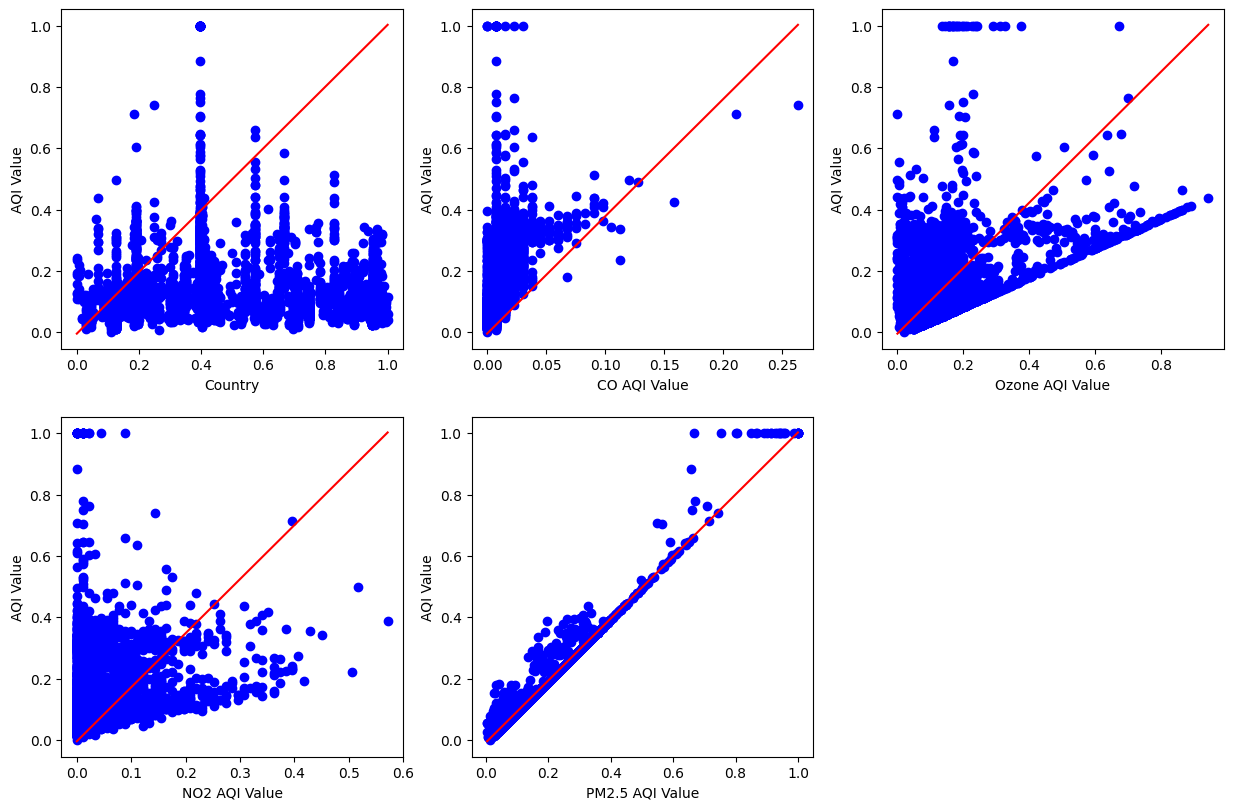

In [ ]:
plt.figure(figsize = (15,15))
col_names = df1_X_test.columns
for i in range(1, len(col_names)+1):
  plt.subplot(3,3,i)
  visualize_LinearRegr(df1_X_test[col_names[i-1]], df1_y_test, predicted, col_names[i-1])


In [ ]:
print("R-squared: ",regr.score(df1_X_test, df1_y_test))

R-squared:  0.9744632338464836


###Shap Value

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 2.4 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.explainers.Linear(regr,df1_X_train)
shap_values = explainer(df1_X_test)

Shap_values [0]


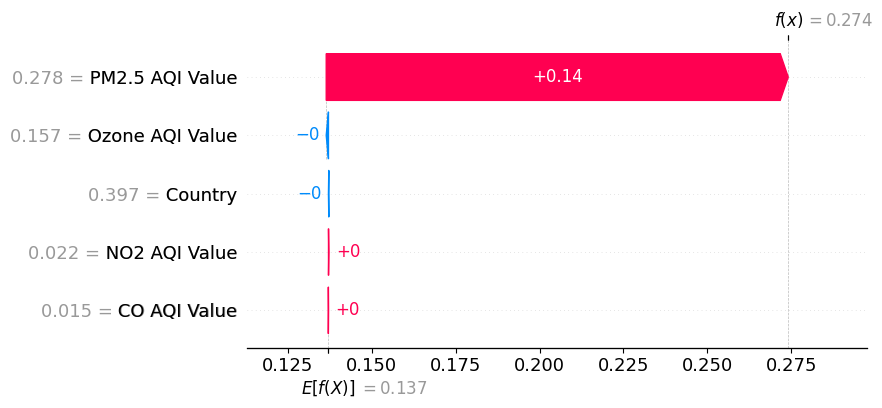

Shap_values [1]


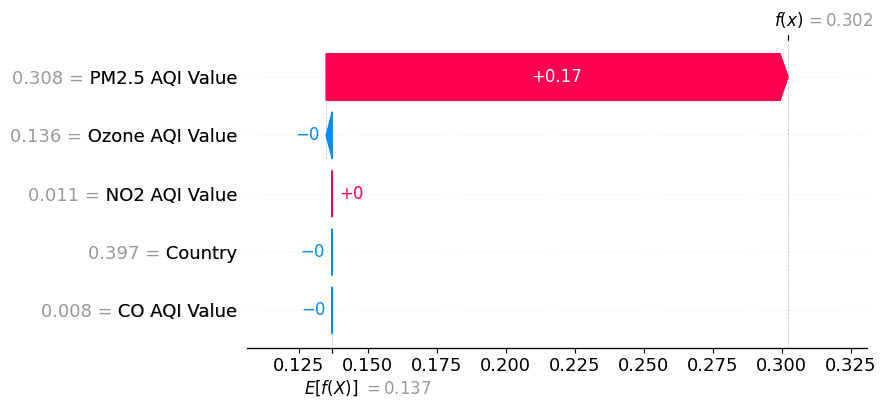

Shap_values [2]


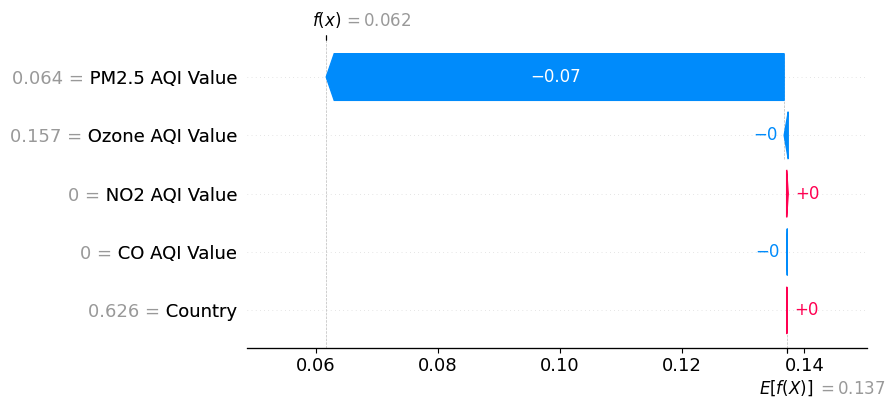

Shap_values [3]


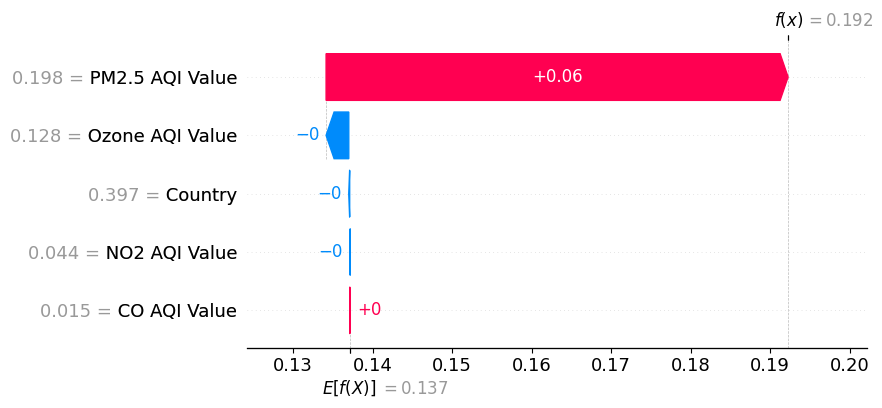

Shap_values [4]


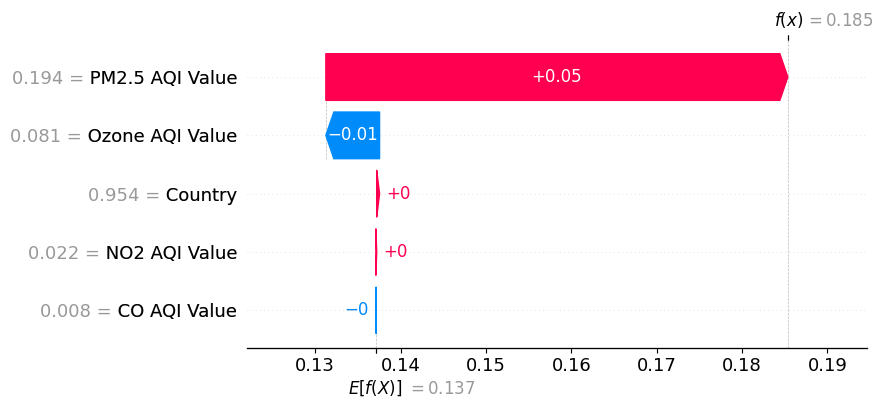

Shap_values [5]


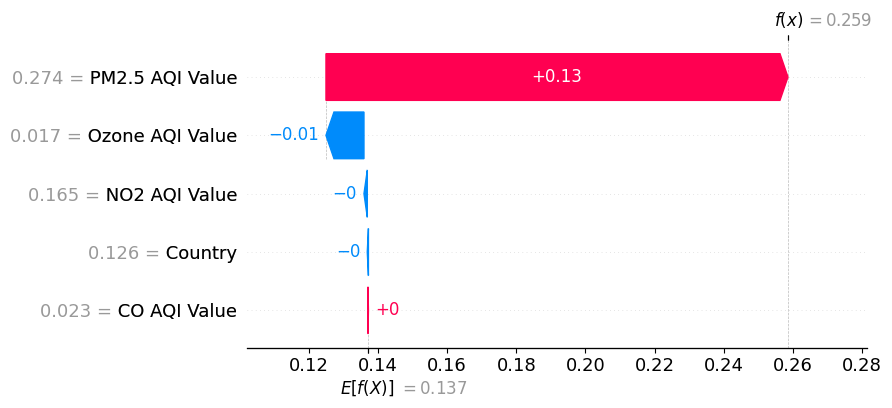

Shap_values [6]


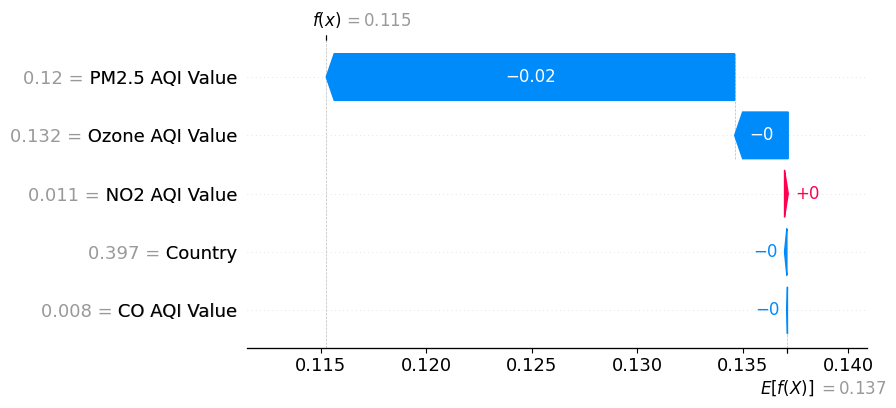

Shap_values [7]


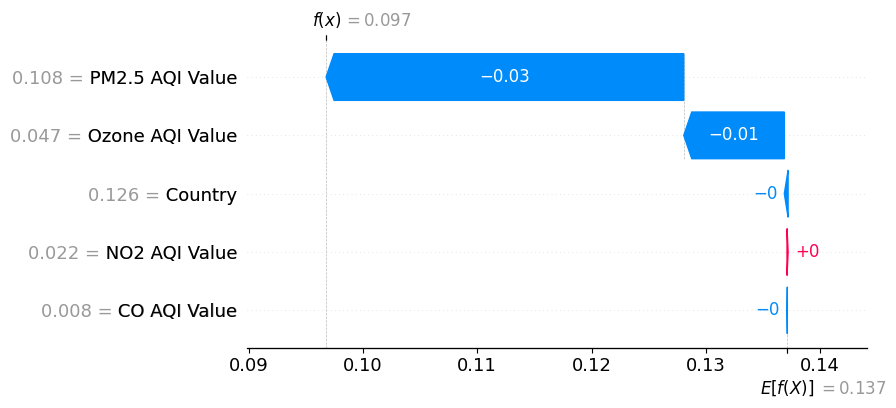

Shap_values [8]


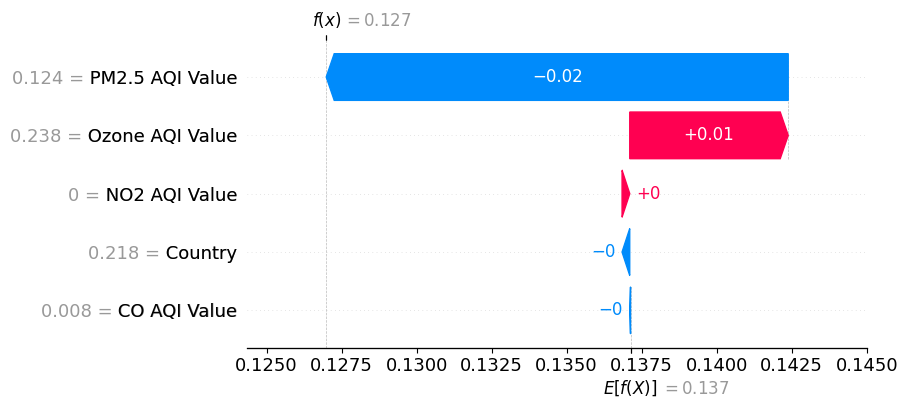

Shap_values [9]


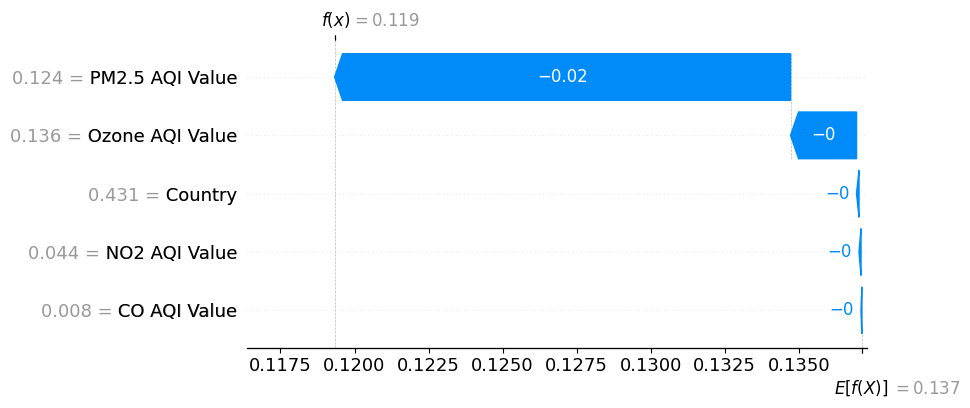

In [ ]:
for i in range(10):
  print("Shap_values [%s]" % (i))
  shap.plots.waterfall(shap_values[i])

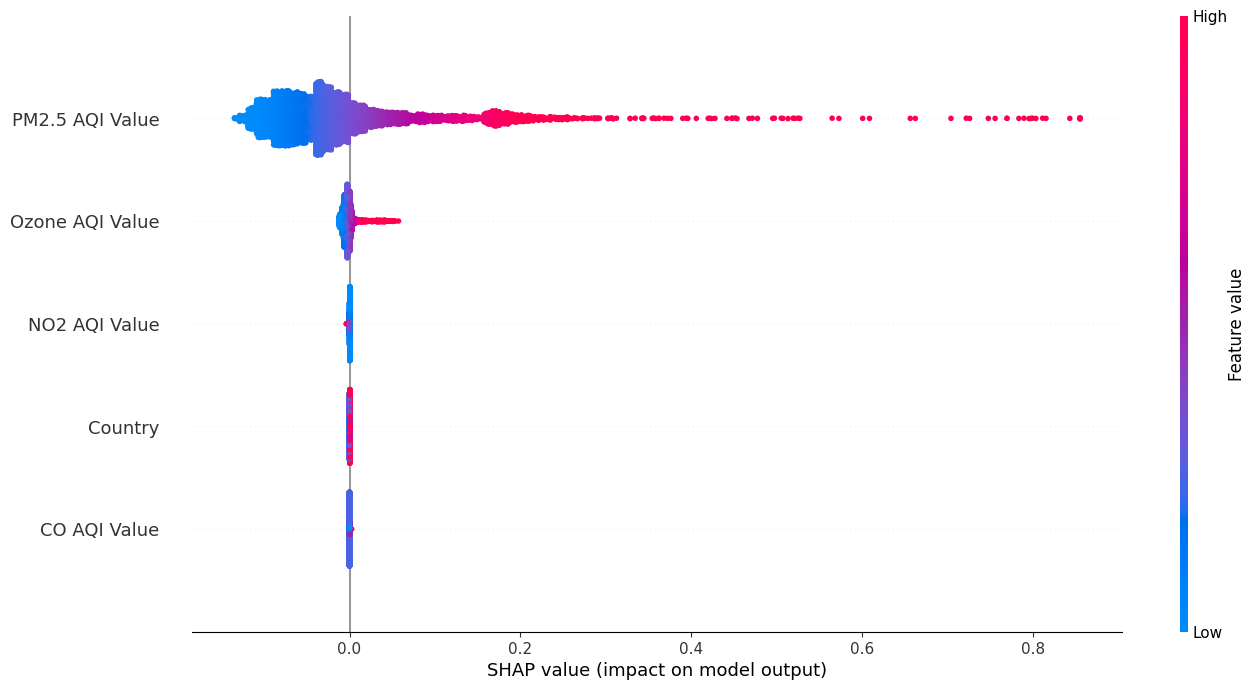

In [ ]:
shap.plots.beeswarm(shap_values, plot_size=(15,8))

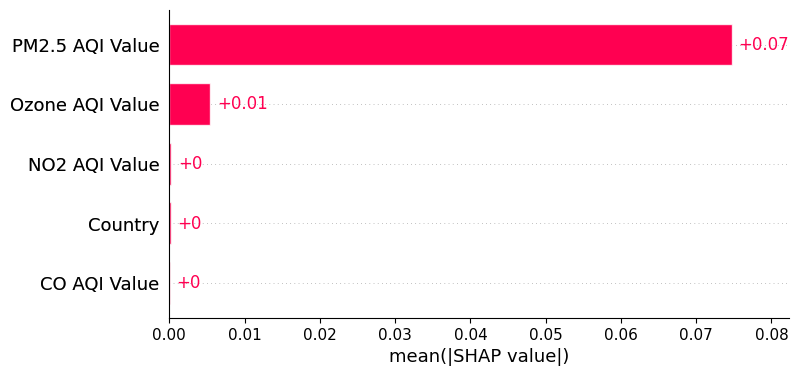

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.initjs()

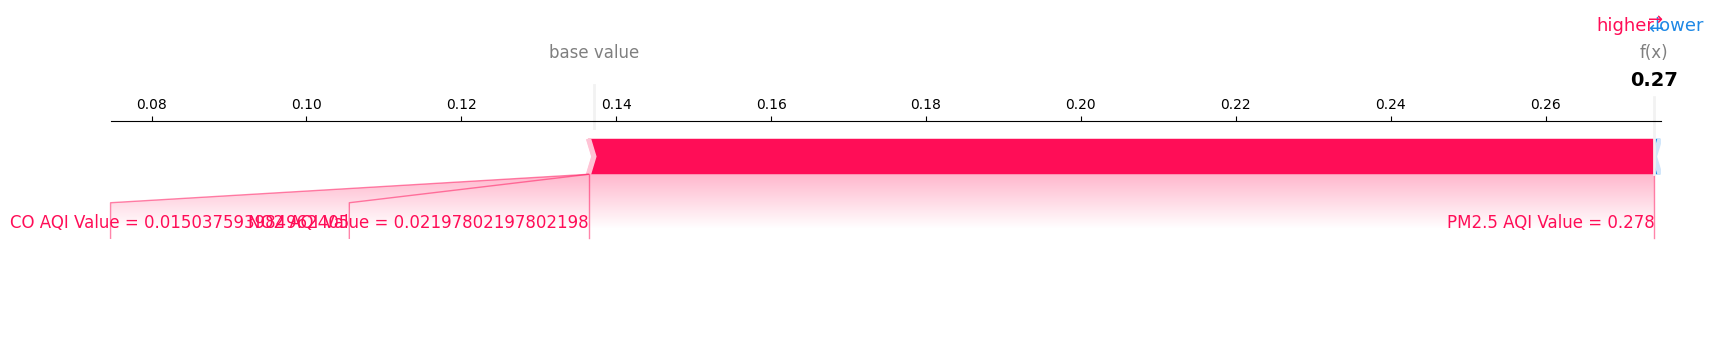

In [ ]:
shap.plots.force(shap_values[0], matplotlib = True, )

###Evaluate by AQI Category

In [ ]:
predicted = regr.predict(df1_X_test)

In [ ]:
def rev_min_max_func(scaled_val):
    max_val = max(df1['AQI Value'])
    min_val = min(df['AQI Value'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

In [ ]:
evaluate = pd.DataFrame({'predicted': list(predicted)})

In [ ]:
evaluate['true value'] = list(df1_y_test)

In [ ]:
evaluate['predicted'] = evaluate['predicted'].apply(lambda x: rev_min_max_func(x))

In [ ]:
evaluate['true value'] = evaluate['true value'].apply(lambda x: rev_min_max_func(x))

In [ ]:
evaluate.columns = ['Predicted AQI Value','True AQI Value']

In [ ]:
evaluate.head(10)

,predicted
0,0.27
1,0.30
2,0.06
3,0.19
4,0.19
5,0.26
6,0.12
7,0.10
8,0.13
9,0.12


In [ ]:
print(max(abs((evaluate['Predicted AQI Value'] - evaluate['True AQI Value']))))

167.2238461610961


In [ ]:
print('Giá trị chênh lệch lớn nhất ghi nhận được: ', max(abs(evaluate['Predicted AQI Value'] - evaluate['True AQI Value'])))

Giá trị chênh lệch lớn nhất ghi nhận được:  167.2238461610961


In [ ]:
import statistics
print('Giá trị chênh lệch trung bình ghi nhận được: ', statistics.mean(abs(evaluate['Predicted AQI Value'] - evaluate['True AQI Value'])))

Giá trị chênh lệch trung bình ghi nhận được:  4.917572014234322


In [ ]:
def convert_to_label(value):
  if (value <= 50):
    res = 0
  elif (value <= 100):
    res = 1
  elif (value <= 150):
    res = 2
  elif (value <= 200):
    res = 3
  elif (value <= 300):
    res = 4
  else:
    res= 5
  return res

In [ ]:
evaluate['Predicted AQI Category'] = evaluate['Predicted AQI Value'].apply(lambda x: convert_to_label(x))
evaluate['True AQI Category'] = evaluate['True AQI Value'].apply(lambda x: convert_to_label(x))
evaluate.head(10)

,Predicted AQI Value,True AQI Value,Predicted AQI Category,True AQI Category
0,141.38,139.00,2,2
1,155.33,154.00,3,3
2,36.48,37.00,0,0
3,100.97,99.00,2,1
4,97.57,97.00,1,1
5,133.73,137.00,2,2
6,62.94,60.00,1,1
7,53.81,54.00,1,1
8,68.73,62.00,1,1
9,64.95,62.00,1,1


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(evaluate['True AQI Category'], evaluate['Predicted AQI Category']))

Accuracy:  0.9318428478402431


In [ ]:
evaluate_bad = evaluate[evaluate['True AQI Category']>2]
evaluate_bad.head(10)

,Predicted AQI Value,True AQI Value,Predicted AQI Category,True AQI Category
1,155.33,154.00,3,3
15,198.86,194.00,3,3
31,168.24,167.00,3,3
44,208.59,191.00,4,3
46,108.23,172.00,2,3
56,193.28,192.00,3,3
57,220.10,224.00,4,4
62,167.96,159.00,3,3
66,165.88,154.00,3,3
69,159.91,161.00,3,3


In [ ]:
print('Accuracy: ', accuracy_score(evaluate_bad['True AQI Category'], evaluate_bad['Predicted AQI Category']))

Accuracy:  0.9008097165991903


###Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(evaluate['True AQI Category'], evaluate['Predicted AQI Category'])

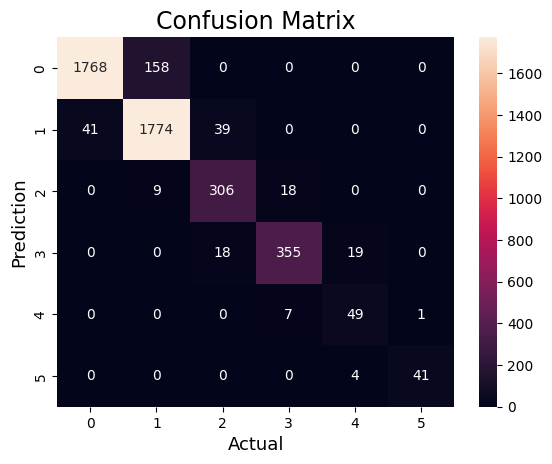

In [ ]:
sb.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

##K-mean

Text(0.5, 1.0, 'ELbow')

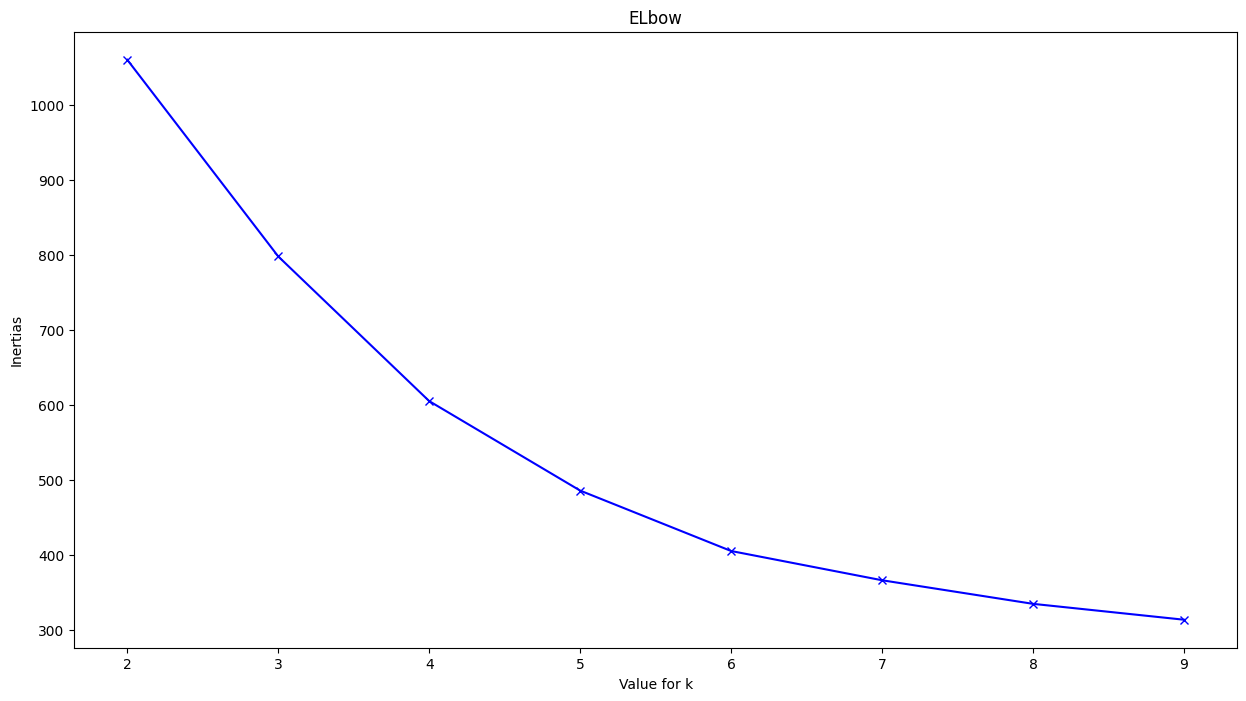

In [ ]:
from sklearn.cluster import KMeans
inertias = []
fig = plt.figure( figsize=(15,8))
for i in range(2,10):
  kmean = KMeans(n_clusters = i)
  kmean.fit(df1_scaled)
  inertias.append(kmean.inertia_)
ax = plt.plot(range(2,10), inertias, 'bx-')
plt.xlabel('Value for k')
plt.ylabel('Inertias')
plt.title('ELbow')

We choose 6

In [ ]:
def scatter_cluster(data, x_title, y_title):
  fig = plt.figure(figsize = (15,8))
  ax = sb.scatterplot(data = data,
                      x = x_title,
                      y = y_title,
                      hue = 'cluster',
                      palette = 'pastel')
  plt.xlabel(x_title, fontsize = 18)
  plt.ylabel(y_title, fontsize = 18)

In [ ]:
def visualize_kmean(data_org, data_scaled, col_names, n):
  kmean = KMeans(n_clusters = n)
  cluster = kmean.fit_predict(data_scaled)
  data_org['cluster'] = cluster
  for i in range(len(col_names)):
    scatter_cluster(data_org, col_names[i], "AQI Value" )
  scatter_cluster(data_org, 'cluster', 'AQI Value')

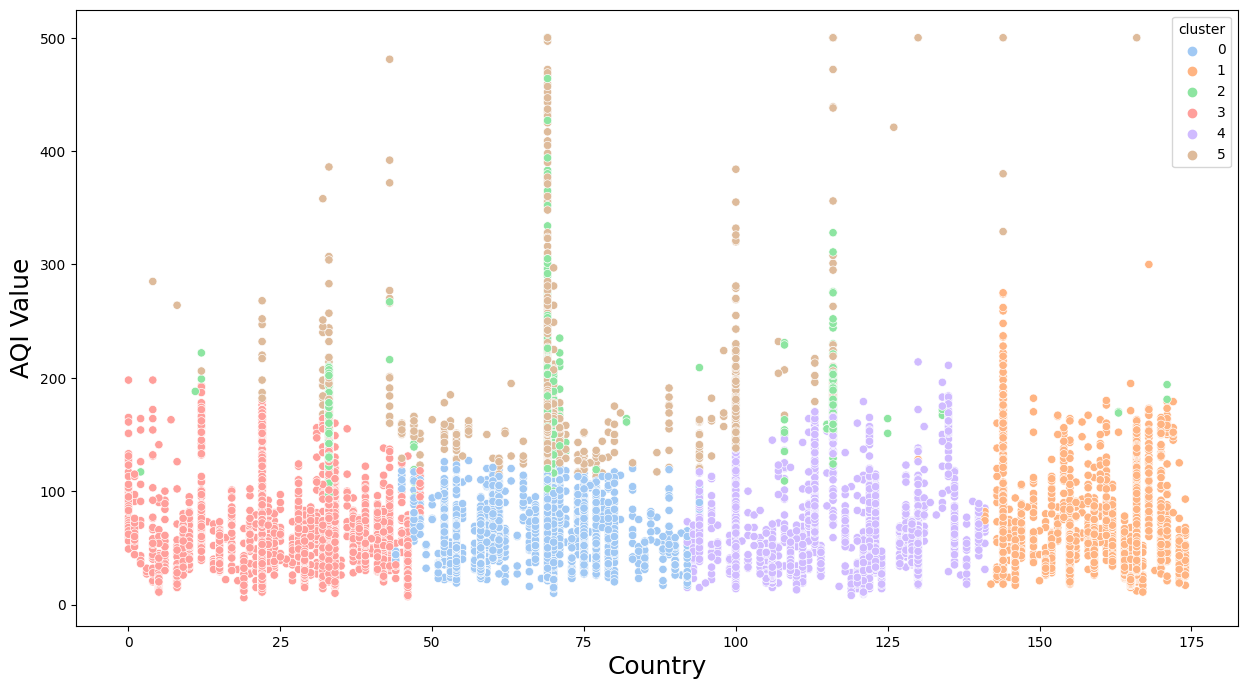

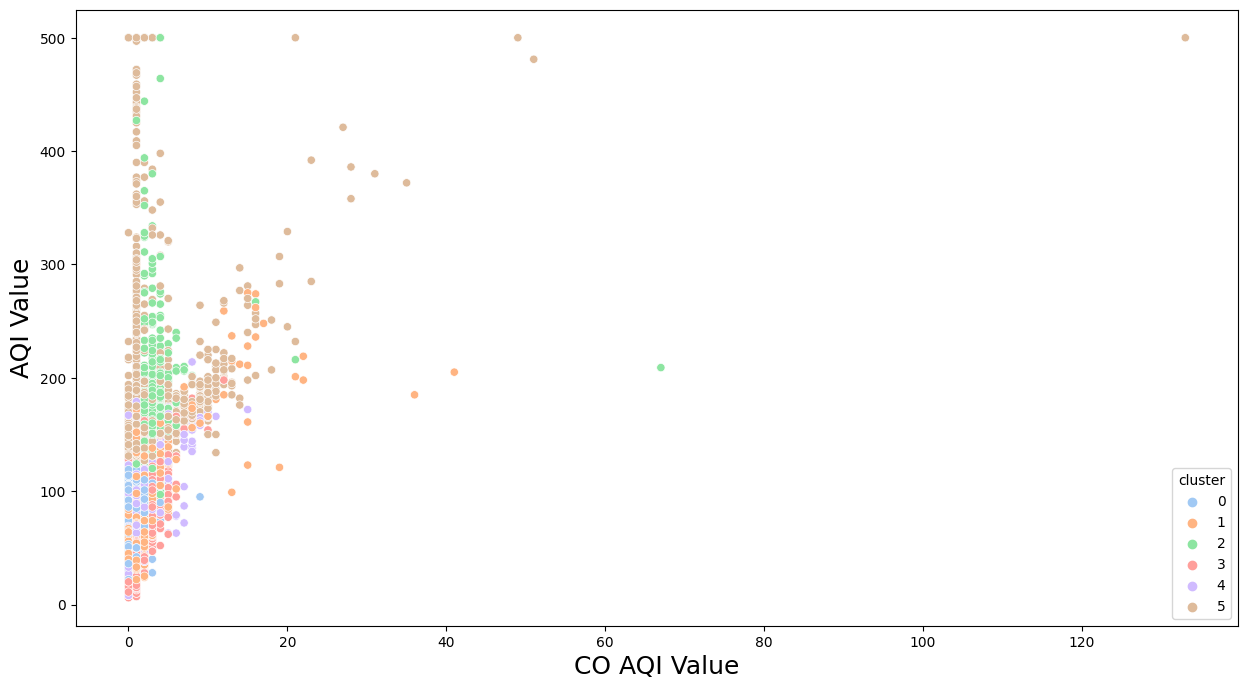

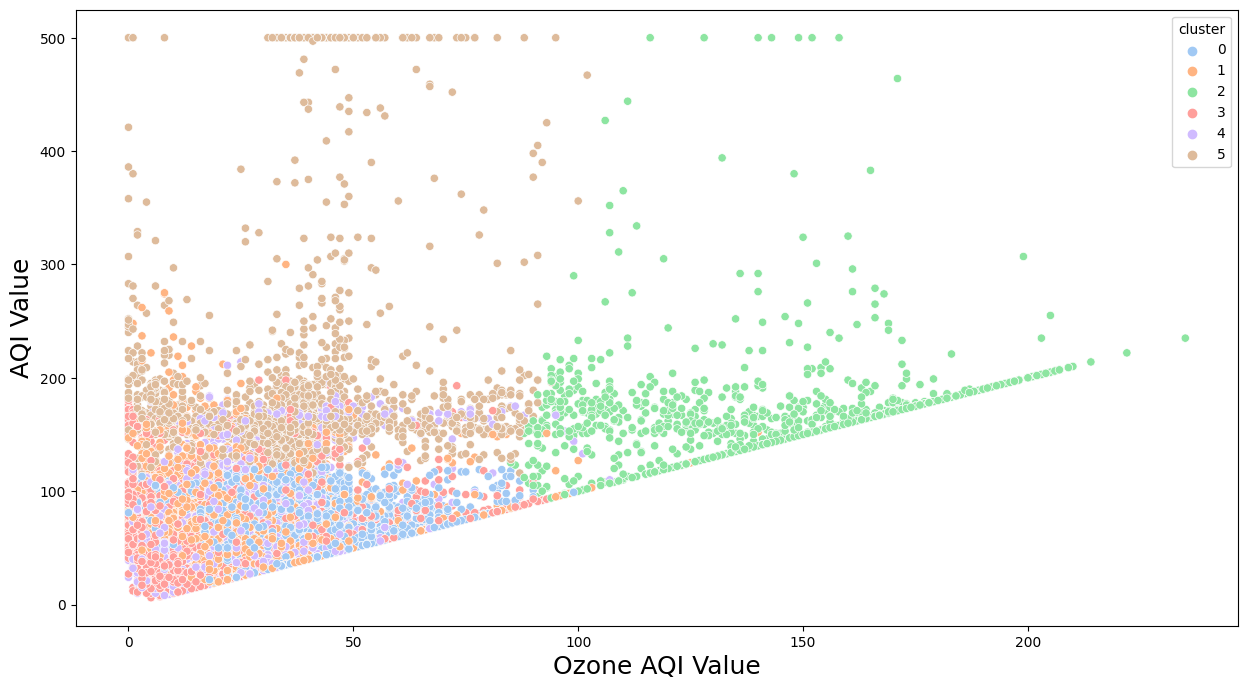

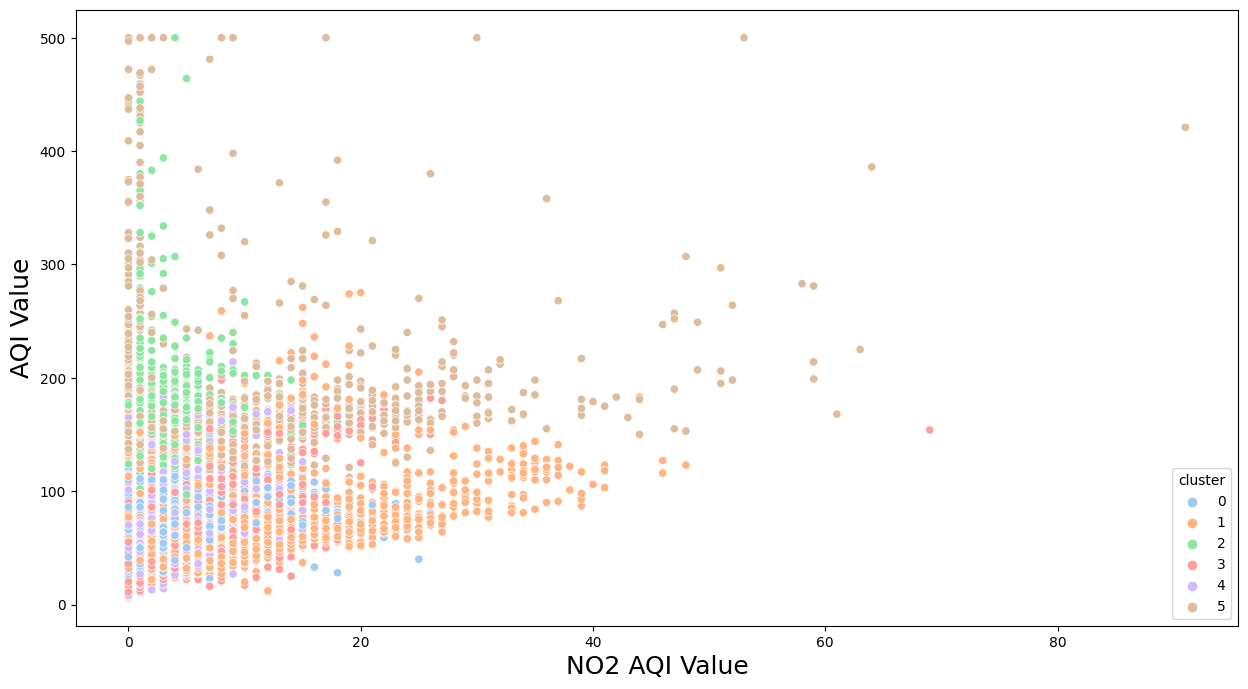

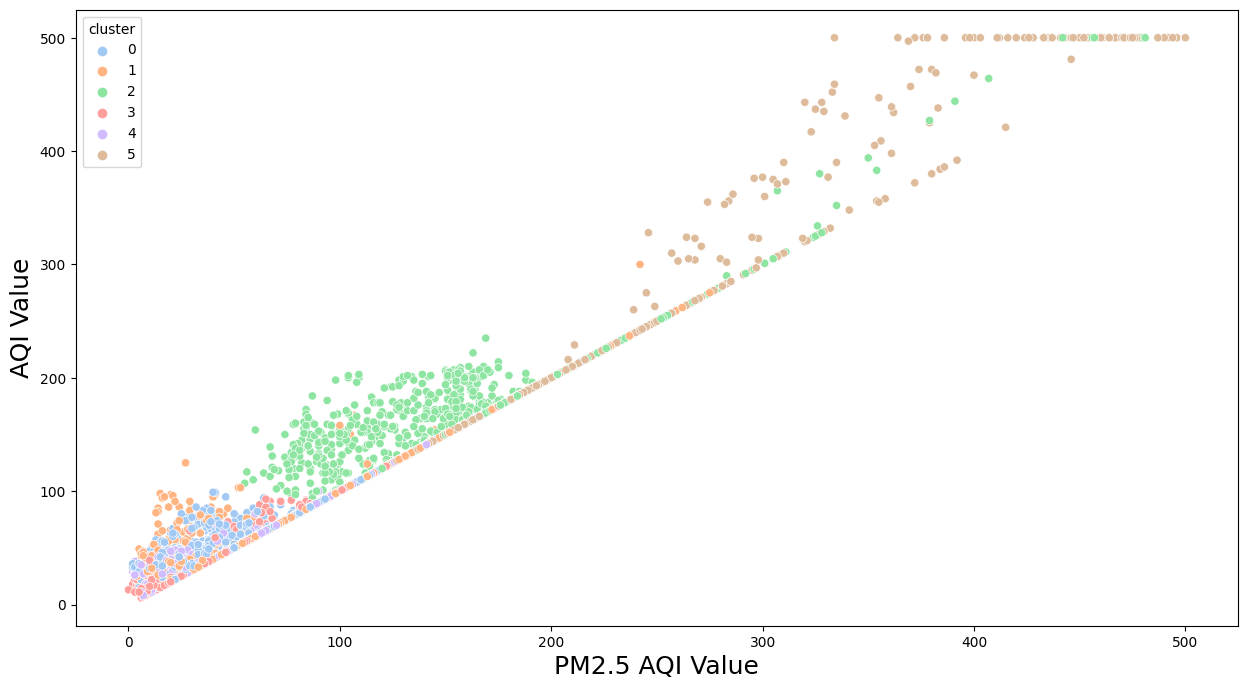

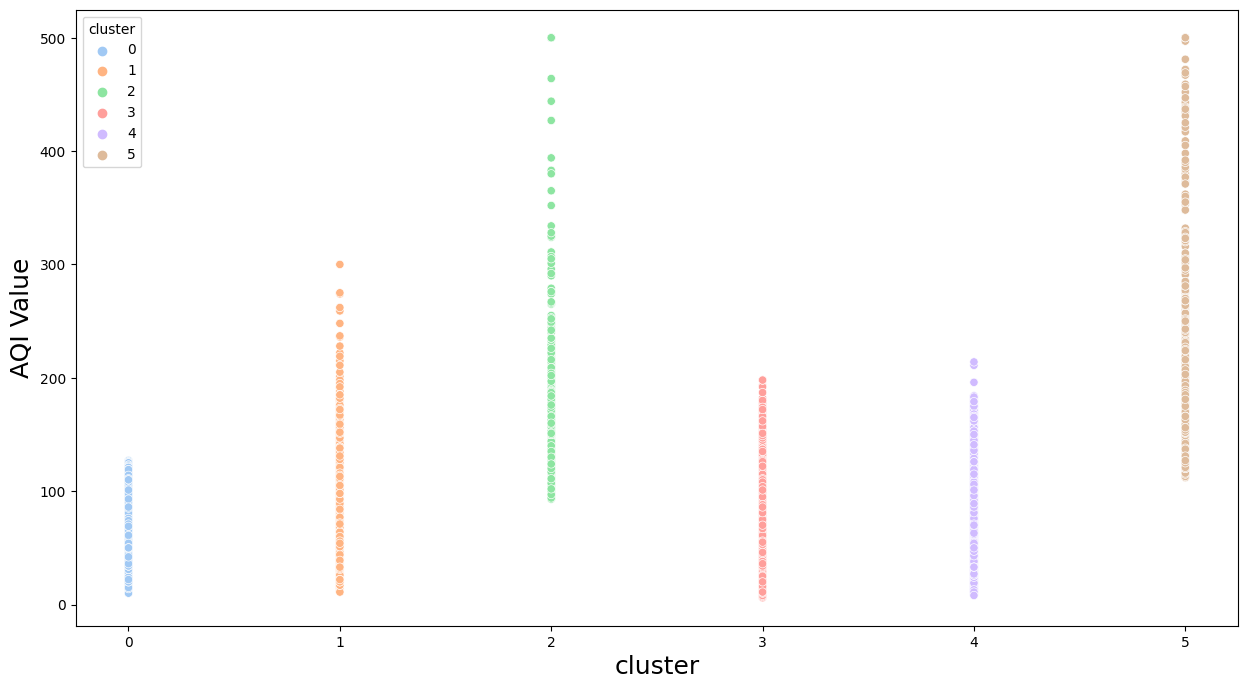

In [ ]:
visualize_kmean(df1, df1_scaled, col_names, 6)

#Data mining df2:

In [ ]:
df2.head()

,Country,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,130,1,1,36,0,51
1,22,0,1,5,1,41
2,75,1,1,39,2,66
3,123,0,1,34,0,20
4,54,0,0,22,0,6


##Split train test:

In [ ]:
df2_y = df2.pop('AQI Category')

In [ ]:
df2_X = df2

In [ ]:
df2_X

,Country,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,130,1,36,0,51
1,22,1,5,1,41
2,75,1,39,2,66
3,123,1,34,0,20
4,54,0,22,0,6
...,...,...,...,...,...
23458,69,3,154,2,184
23459,54,1,20,5,50
23460,69,1,22,1,50
23461,166,1,44,2,71


In [ ]:
from sklearn.model_selection import train_test_split
df2_X_train, df2_X_test, df2_y_train, df2_y_test = train_test_split(df2_X,df2_y,test_size=0.2, random_state=42)

###Lazy predict classification

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,
                     ignore_warnings=False,
                     custom_metric=None)

# fitting data in LazyClassifier
models, predictions = clf.fit(df2_X_train, df2_X_test,
                              df2_y_train, df2_y_test)

ModuleNotFoundError: ignored

In [ ]:
print(predictions)

##Decision

####Import packages

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from graphviz import Source
from graphviz import render

Error: dot: can't open fname.dot


CalledProcessError: ignored

####Grid search

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [ ]:
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(df2_X_train, df2_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
print(best_model)

DecisionTreeClassifier(criterion='entropy', max_depth=10)


In [ ]:
print(grid_search.best_score_)

0.9995658809489278


In [ ]:
df2_y_train = df2_y_train.apply(lambda x: str(x))

In [ ]:
df2_y_train.head()

18951    0
2089     1
15283    2
1079     0
11985    1
Name: AQI Category, dtype: object

In [ ]:
df2_y_test = df2_y_test.apply(lambda x: str(x))

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
tree_clf.fit(df2_X_train, df2_y_train)
predicted = tree_clf.predict(df2_X_test)

print("Accuracy: ", accuracy_score(list(df2_y_test),list(predicted)))
print("Balanced accuracy: ", balanced_accuracy_score(list(df2_y_test), list(predicted)))

Accuracy:  0.9991317560234426
Balanced accuracy:  0.9867446393762184


In [ ]:
evaluate_tree = pd.DataFrame({'True AQI Category': list(df2_y_test), 'Predicted AQI Category': list(predicted)})
evaluate_tree.head(10)

,True AQI Category,Predicted AQI Category
0,2,2
1,3,3
2,0,0
3,1,1
4,1,1
5,2,2
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
print(tree_clf.classes_)

['0' '1' '2' '3' '4' '5']


In [ ]:
dot_data = export_graphviz(tree_clf,
                            out_file="AQI_tree.dot",
                            feature_names=df2_X_train.columns,
                            class_names=tree_clf.classes_,
                            rounded=True,
                            filled=True)

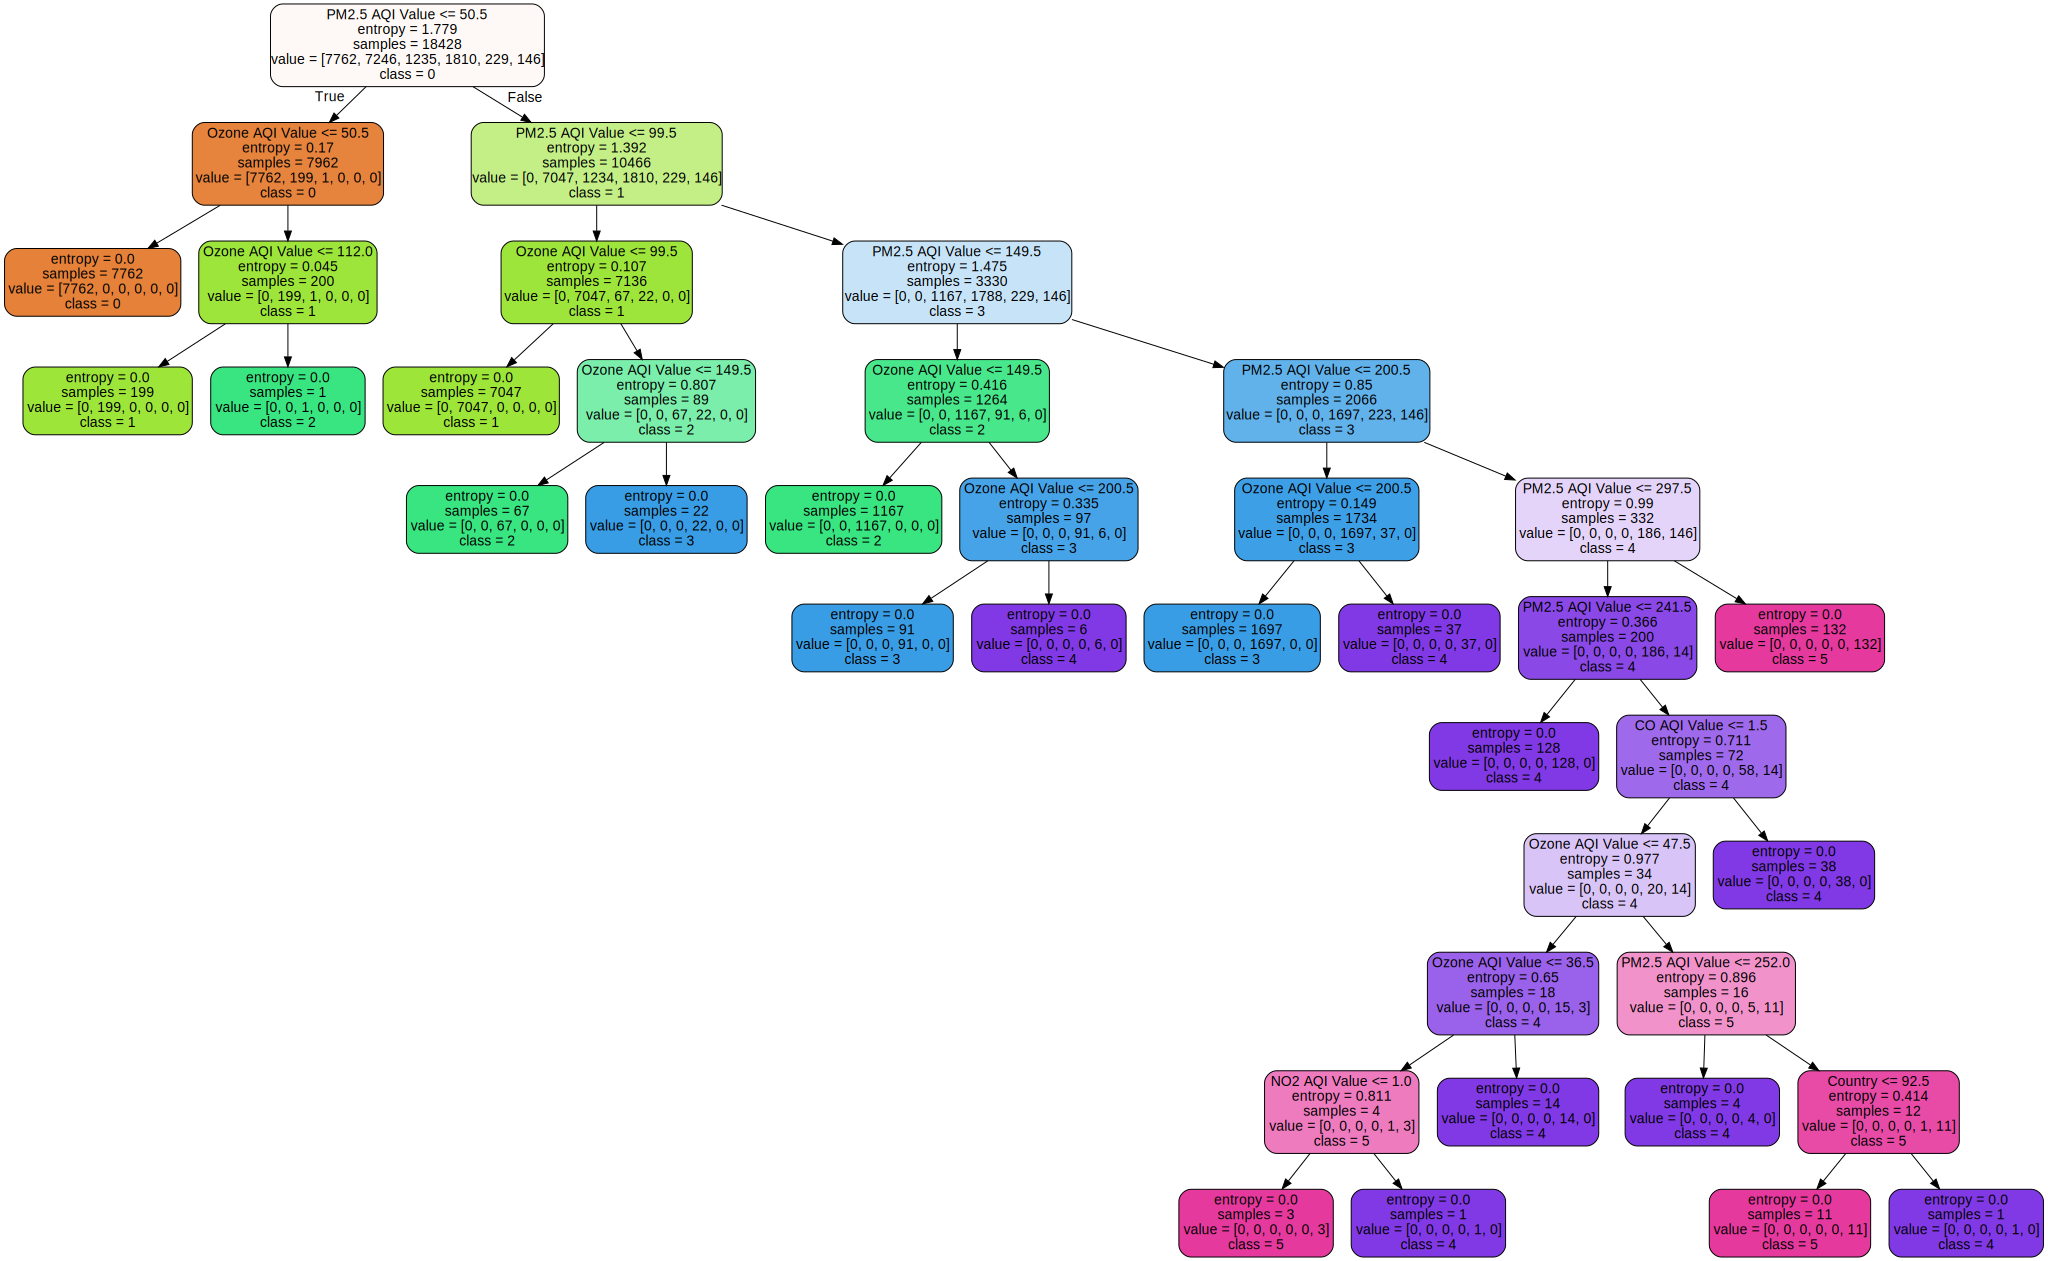

In [ ]:
with open("AQI_tree.dot") as f:
    dot_graph = f.read()

Source(dot_graph)

In [ ]:
render('dot', 'png', 'AQI_tree.dot')

'AQI_tree.dot.png'

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(evaluate_tree['True AQI Category'], evaluate_tree['Predicted AQI Category'])

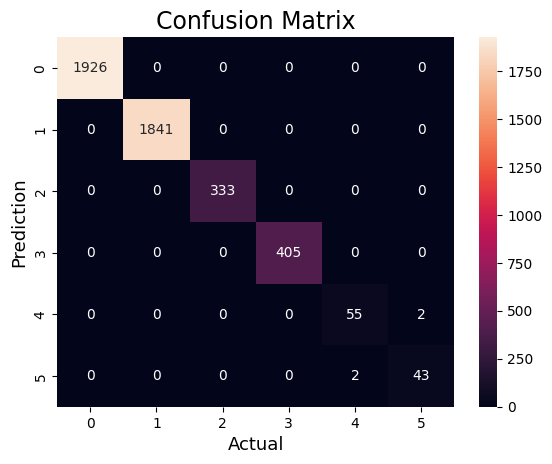

In [ ]:
sb.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print(tree_clf.feature_importances_)

[1.51470107e-04 5.47111557e-04 8.90469473e-02 9.89845182e-05
 9.10155486e-01]


In [ ]:
print(max(tree_clf.feature_importances_))

0.9101554864705468


In [ ]:
impact_of_features = pd.DataFrame({'Features': df2_X_train.columns, 'Impact to result': tree_clf.feature_importances_})

In [ ]:
impact_of_features

,Features,Impact to result
0,Country,0.000151
1,CO AQI Value,0.000547
2,Ozone AQI Value,0.089047
3,NO2 AQI Value,0.000099
4,PM2.5 AQI Value,0.910155
